# from g and v0 generate coordinate
$ x = v_0 \cdot t$  
$ y = \frac{1}{2}gt^2$

In [7]:
import numpy as np
def generate_y(g):
    length = 100
    t = np.linspace(0,10,length,dtype=np.float32)
    y = 1/2 * g * (t**2)
    return y.reshape(1,length,1), np.array(g).reshape(1,1)

In [9]:
def generateData(batch):
    '''
    - return Y.shape = (batch, W, channel=1), G.shape=(batch, 1)
    '''
    
    g = 8+ np.random.rand()*2 
    Y,G = generate_y(g)
    i = 1
    while True:
        g = 8+ np.random.rand()*2 
        y,g = generate_y(g)
        Y = np.concatenate((Y,y),axis=0)
        G = np.concatenate((G,g),axis=0)
        i += 1
        if i % batch == 0:
            yield Y,G
            g = 8+ np.random.rand()*2 
            Y,G = generate_y(g)
            i = 1


In [40]:
batch = 50
data = generateData(batch)
next(data)[0].shape

(50, 100, 1)

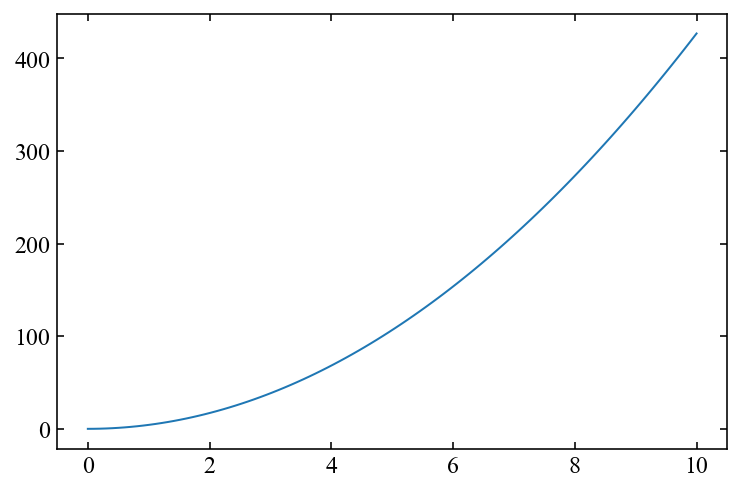

In [231]:
plt.plot(np.linspace(0,10,100),next(data)[0][0])

In [11]:
import tensorflow as tf
import numpy as np
# tf.test.is_gpu_available()
from tensorflow.keras import Input,Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,Conv1D

Conv1D
https://blog.csdn.net/VeritasCN/article/details/90050584

a = np.arange(10).reshape(1,10,1).astype(np.float32) # （B, W, C)
conv1d = Conv1D(1,3,padding='same',input_shape=(None,))# (n_kernels, kernel_size)

conv1d(a)

In [103]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv1D(1, 3, strides=2, padding='same', input_shape=(100,))
        self.conv2 = Conv1D(1, 3, strides=2, padding='same')
        self.flatten = Flatten()
        self.fc1 = Dense(100, activation='relu') # 默认use_bias=True, 
        self.fc2 = Dense(100, activation='relu')
        self.fc3 = Dense(100, activation='relu')
        
        self.out = Dense(1)
    
    def call(self, x):

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        return x


my_model = MyModel()  

In [104]:
batch = 50
data = generateData(batch)

In [105]:
next(data)[1].shape

(50, 1)

In [106]:
x = next(data)[0]
print('x.shape:',x.shape)
my_model(x).shape

x.shape: (50, 100, 1)


TensorShape([50, 1])

In [107]:
my_model.summary()

Model: "my_model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            multiple                  4         
_________________________________________________________________
conv1d_10 (Conv1D)           multiple                  4         
_________________________________________________________________
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_11 (Dense)             multiple                  2600      
_________________________________________________________________
dense_12 (Dense)             multiple                  10100     
_________________________________________________________________
dense_13 (Dense)             multiple                  10100     
_________________________________________________________________
dense_14 (Dense)             multiple                  1

In [108]:
my_model.compile(loss='mse', optimizer='Adam')

In [109]:
# 使用集成度较低的 Model.train_on_batch方法，自行设定batch数据　和　ｅpochs
for step in range(500):
    train_data = next(data)
    cost = my_model.train_on_batch(train_data[0], train_data[1])
    if step%100==0:
        print(f'loss: {cost}')

loss: 2919.152099609375
loss: 0.019801896065473557
loss: 7.749268888801453e-07
loss: 9.745544815586982e-08
loss: 1.1928631238333764e-07


In [113]:
test_data = next(data)
tx = test_data[0]
ty = test_data[1]
test_x=tx[0].reshape(1,100,1)

print('True:',ty[0],
      'predict:',my_model.predict(test_x))

True: [9.33175174] predict: [[9.331847]]
